In [1]:
%matplotlib inline
import os
import sys
import copy
import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import adjusted_mutual_info_score as ami

In [2]:
from sklearn.metrics import silhouette_score as sil

In [3]:
sys.path.insert(1, os.path.join(sys.path[0],"/home/tkurihana/scratch-midway2/data/MOD06/" ) )
from analysis_lib import _get_swath, _load_tif_data
from analysis_lib import _get_colors, _gen_patches, _anl_agl
from analysis_lib import cluster_plotting2, cluster_plotting

In [4]:
gee_datadir = '/home/tkurihana/scratch-midway2/data/GEE'
swath_filename = '2017-01-01_MOD09GA_mixed-cell.tif'
swath1 = _get_swath(gee_datadir, swath_filename)

 Shape  (2219, 4991, 7)


### model load

latest iteration steps at March 25: 129750

In [5]:
model_dir = '/project/foster/clouds/output/m9_26_Global_June_2015_2016/'

In [6]:
iteration = 129750

In [7]:
# encoder part
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder-'+str(iteration)+'.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m26 = tf.keras.models.model_from_json(f.read())
encoder_m26.load_weights(ENCODER_WEIGHTS)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


baseline model

In [8]:
# encoder part
model_dir='/home/tkurihana/clouds/output/m9-22_oceans/'
ENCODER_DEF=model_dir+'encoder.json'
ENCODER_WEIGHTS=model_dir+'encoder.h5'
with open(ENCODER_DEF,"r") as f:
    encoder_m22 = tf.keras.models.model_from_json(f.read())
encoder_m22.load_weights(ENCODER_WEIGHTS)

##### Plotting

(646, 1, 1, 1024)
sil score= 0.31675833
AMI Score = 0.686057


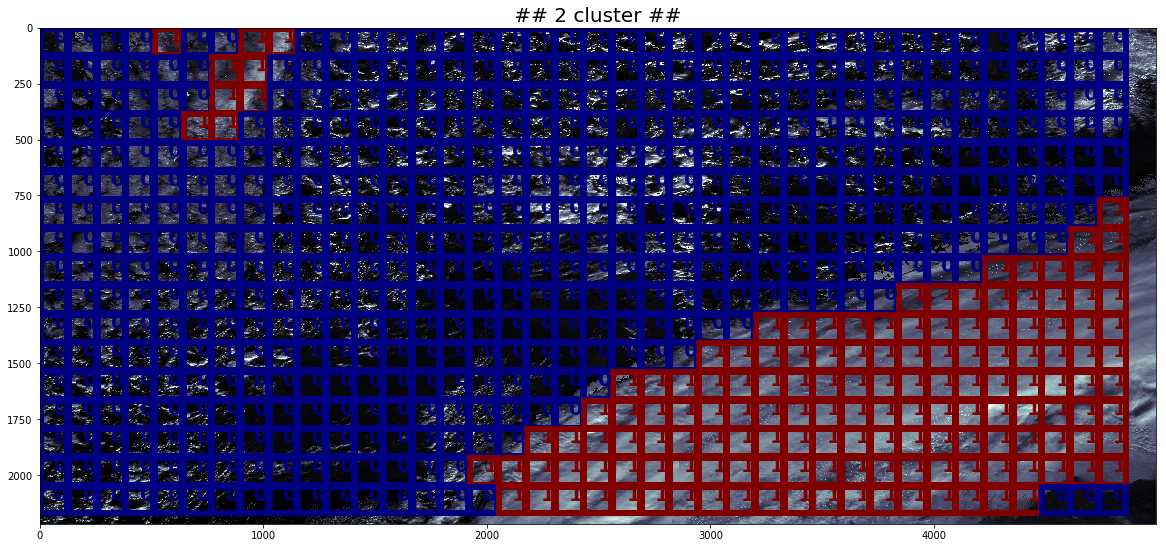

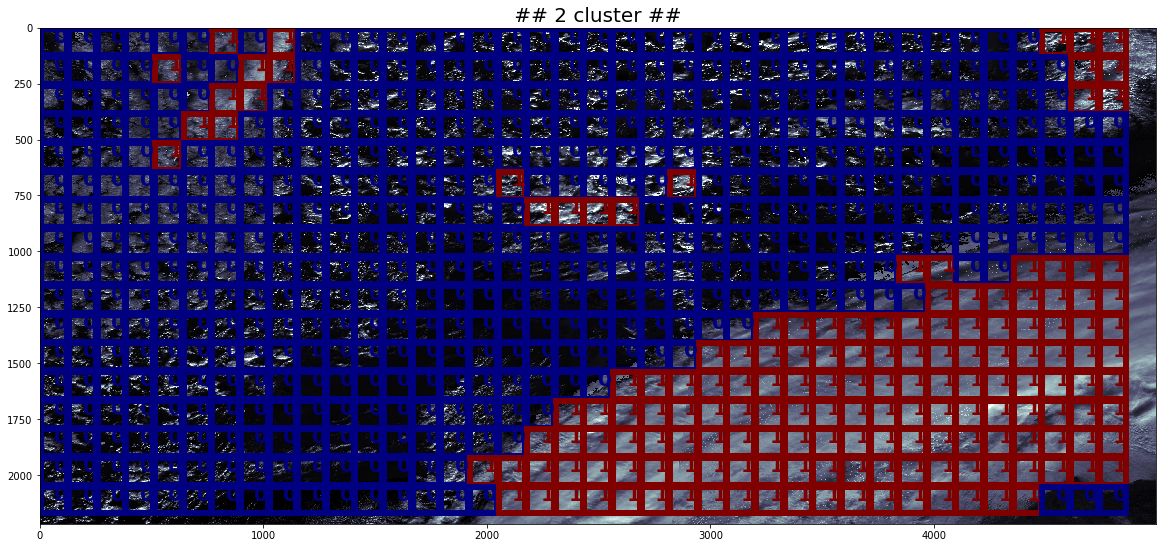

(646, 1, 1, 1024)
sil score= 0.14860836
AMI Score = 0.347974


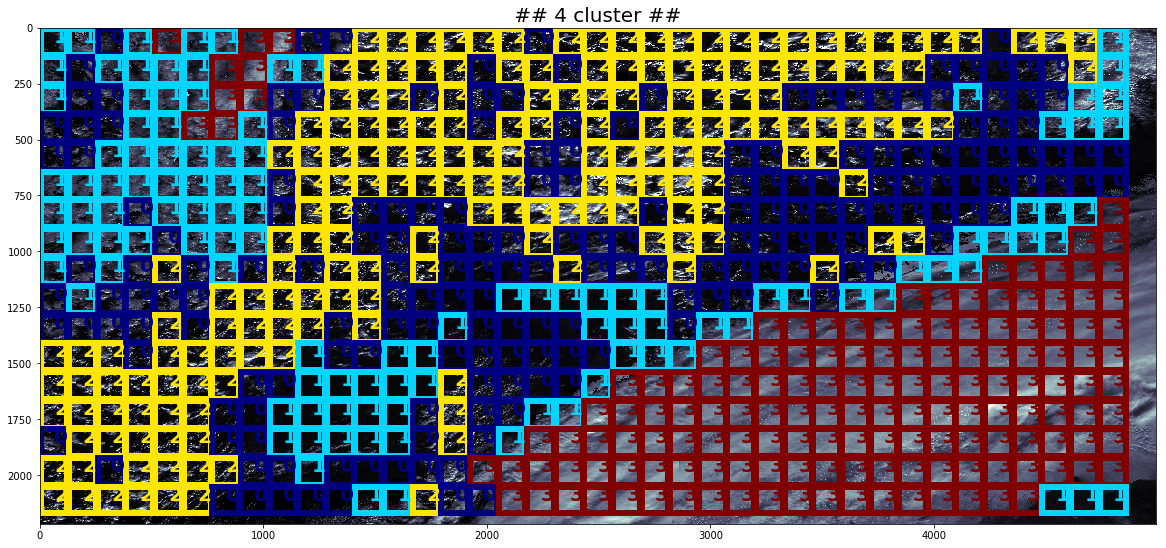

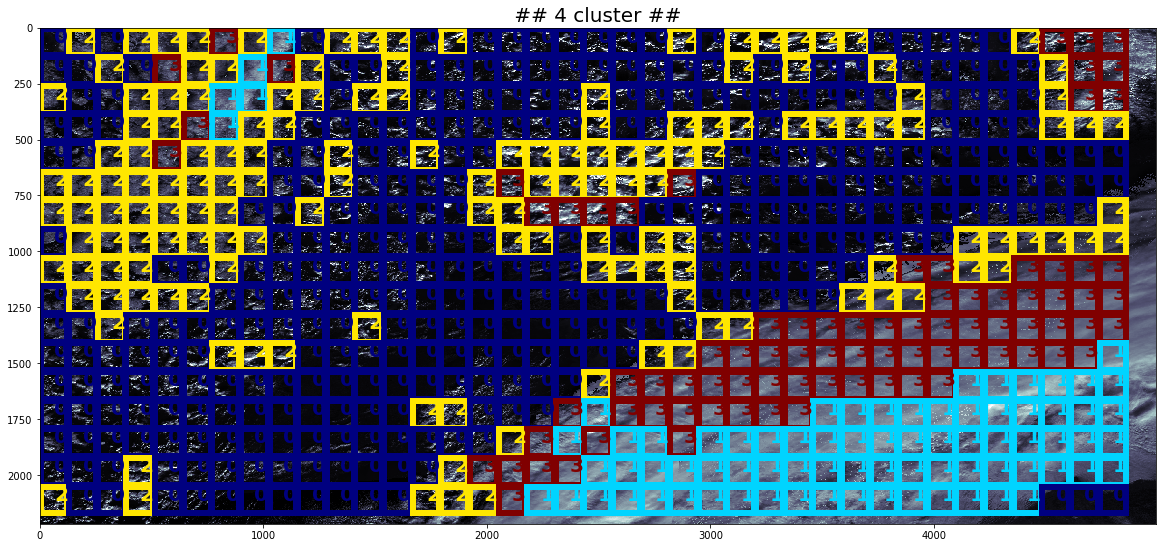

(646, 1, 1, 1024)
sil score= 0.10725917
AMI Score = 0.427725


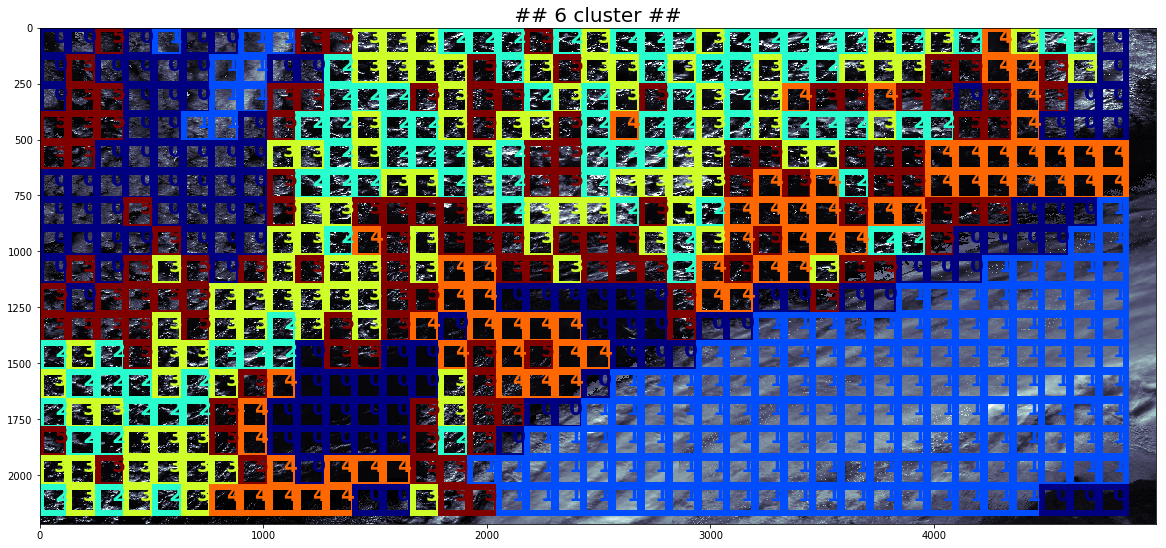

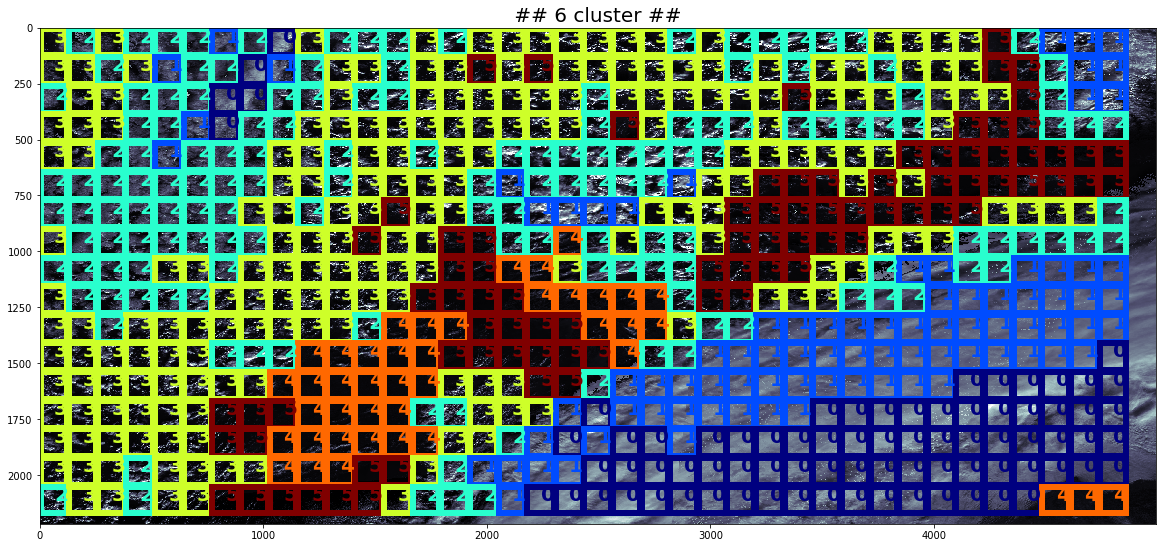

(646, 1, 1, 1024)
sil score= 0.03452481
AMI Score = 0.439550


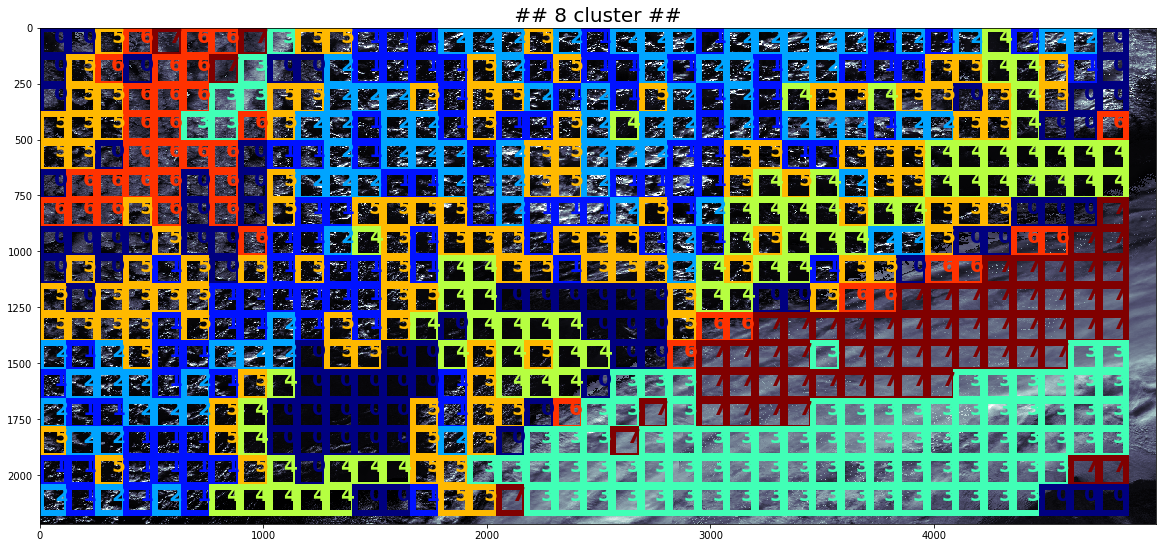

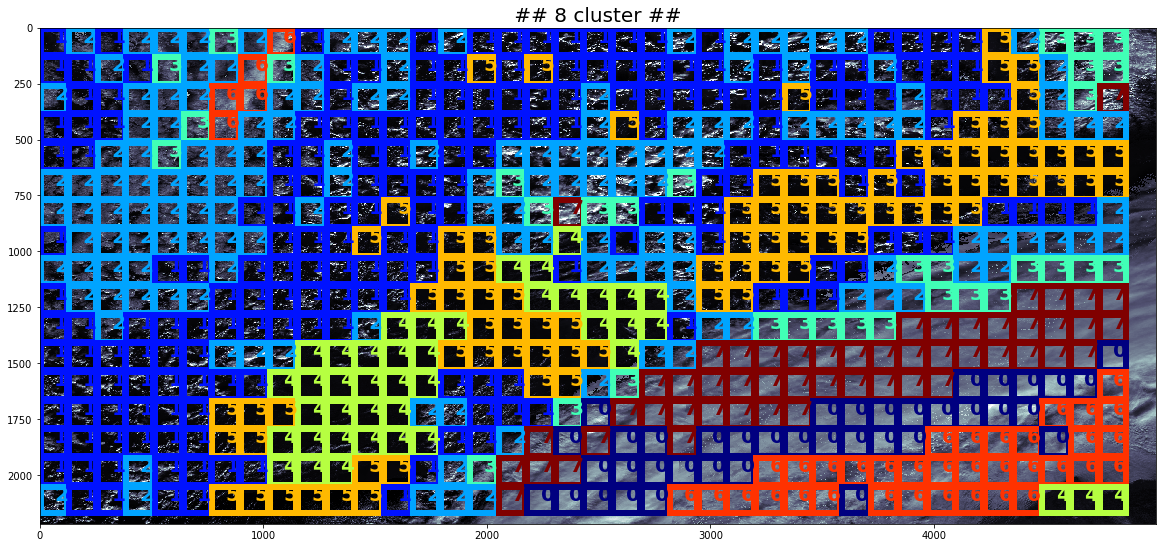

(646, 1, 1, 1024)
sil score= 0.03513902
AMI Score = 0.432014


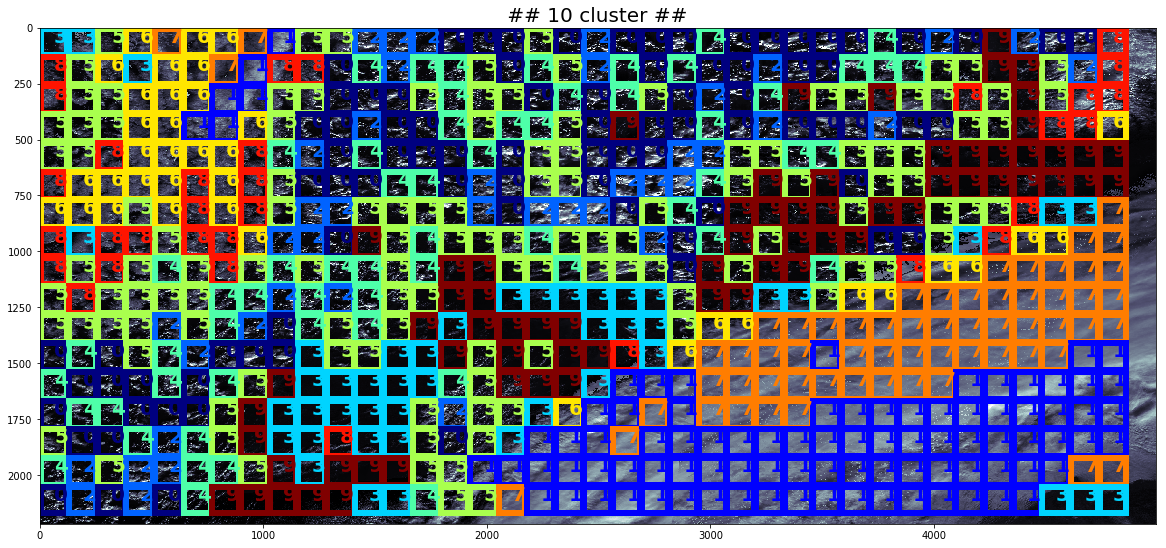

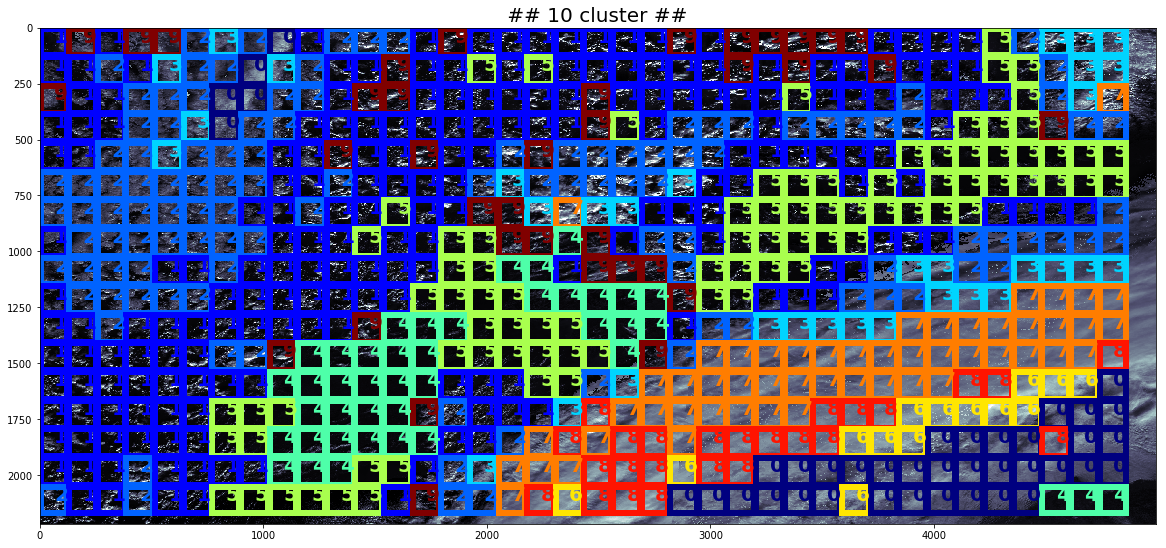

In [11]:
SHAPE = 128, 128, 7
patches = _gen_patches(swath1, normalization=True)
for icluster in [2,4,6,8,10]:
    _patches_labels = _anl_agl(encoder_m26, patches, clusters=icluster)
    patches_label = _anl_agl(encoder_m22, patches, clusters=icluster)
    colors = _get_colors(n=icluster)
    
    # encoder 
    encs = encoder_m26.predict( patches.reshape((-1,128,128,7)) )
    print(encs.shape)
    encs_mean = encs.mean(axis=(1,2))
    
    #score
    print("==============================")
    print("sil score=" , 
          sil(encs_mean, labels=_patches_labels.flatten(), metric='euclidean'), flush=True)
    print("AMI Score = %f" % (ami( patches_label.flatten() , _patches_labels.flatten())))
    
    #plot
    cluster_plotting(swath1, patches,_patches_labels, SHAPE, colors, ncluster=icluster)
    cluster_plotting(swath1, patches,patches_label, SHAPE, colors, ncluster=icluster)

try knn

### KNN from trained dataset (July 2015)